In [59]:
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
key="c834b5da83057a17c24b0a47f76bd35224703c4b"

In [10]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

C:\Users\siddh\AppData\Local\Temp\ipykernel_19904\1593133401.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('AAPL', api_key=key)


In [11]:
df.to_csv('AAPL.csv')

In [13]:
df=pd.read_csv('AAPL.csv')


In [14]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-07-13 00:00:00+00:00,191.33,191.84,190.90,191.08,12519792,45.708487,45.830325,45.605760,45.648762,50079168,0.0,1.0
1,AAPL,2018-07-16 00:00:00+00:00,190.91,192.65,190.42,191.52,15043110,45.608149,46.023833,45.491089,45.753878,60172440,0.0,1.0
2,AAPL,2018-07-17 00:00:00+00:00,191.45,191.87,189.20,189.75,15534523,45.737155,45.837492,45.199633,45.331027,62138092,0.0,1.0
3,AAPL,2018-07-18 00:00:00+00:00,190.40,191.80,189.93,191.78,16393381,45.486311,45.820769,45.374029,45.815991,65573524,0.0,1.0
4,AAPL,2018-07-19 00:00:00+00:00,191.88,192.55,189.69,189.69,20286752,45.839881,45.999943,45.316693,45.316693,81147008,0.0,1.0


In [15]:

df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1251,AAPL,2023-07-05 00:00:00+00:00,191.33,192.98,190.620,191.565,46920261,191.33,192.98,190.620,191.565,46920261,0.0,1.0
1252,AAPL,2023-07-06 00:00:00+00:00,191.81,192.02,189.200,189.840,45156009,191.81,192.02,189.200,189.840,45156009,0.0,1.0
1253,AAPL,2023-07-07 00:00:00+00:00,190.68,192.67,190.240,191.410,46814998,190.68,192.67,190.240,191.410,46814998,0.0,1.0
1254,AAPL,2023-07-10 00:00:00+00:00,188.61,189.99,187.035,189.260,59922163,188.61,189.99,187.035,189.260,59922163,0.0,1.0
1255,AAPL,2023-07-11 00:00:00+00:00,188.08,189.30,186.600,189.160,46638119,188.08,189.30,186.600,189.160,46638119,0.0,1.0


In [16]:
df1=df.reset_index()['close']

In [17]:
df1

0       191.33
1       190.91
2       191.45
3       190.40
4       191.88
         ...  
1251    191.33
1252    191.81
1253    190.68
1254    188.61
1255    188.08
Name: close, Length: 1256, dtype: float64

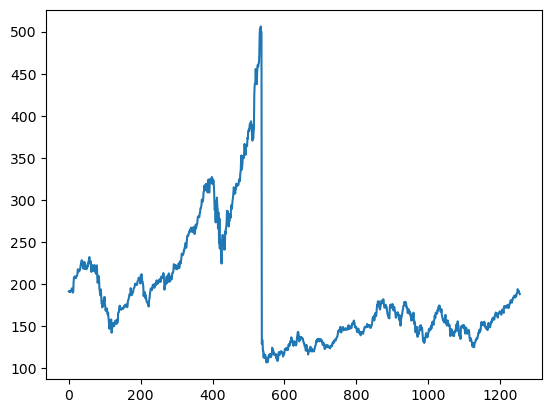

In [18]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [20]:
df1

0       191.33
1       190.91
2       191.45
3       190.40
4       191.88
         ...  
1251    191.33
1252    191.81
1253    190.68
1254    188.61
1255    188.08
Name: close, Length: 1256, dtype: float64

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [22]:
print(df1)

[[0.21162179]
 [0.21056982]
 [0.21192235]
 ...
 [0.20999374]
 [0.20480902]
 [0.20348153]]


In [23]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [24]:
training_size,test_size

(816, 440)

In [25]:
train_data

array([[2.11621791e-01],
       [2.10569818e-01],
       [2.11922354e-01],
       [2.09292423e-01],
       [2.12999374e-01],
       [2.11897307e-01],
       [2.12323106e-01],
       [2.15804634e-01],
       [2.20363181e-01],
       [2.18835316e-01],
       [2.10745147e-01],
       [2.08065122e-01],
       [2.09016907e-01],
       [2.37094552e-01],
       [2.51847214e-01],
       [2.53350031e-01],
       [2.56055103e-01],
       [2.51145899e-01],
       [2.51496556e-01],
       [2.55579211e-01],
       [2.52197871e-01],
       [2.55554164e-01],
       [2.57758297e-01],
       [2.58985598e-01],
       [2.66700063e-01],
       [2.77370069e-01],
       [2.72060113e-01],
       [2.71008140e-01],
       [2.71033187e-01],
       [2.72135254e-01],
       [2.73813400e-01],
       [2.78271760e-01],
       [2.82680025e-01],
       [2.90895429e-01],
       [2.96030056e-01],
       [3.02542267e-01],
       [3.04370695e-01],
       [3.00638698e-01],
       [2.91195992e-01],
       [2.86687539e-01],


In [26]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [27]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [28]:
print(X_train.shape), print(y_train.shape)

(715, 100)
(715,)


(None, None)

In [29]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [30]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [32]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 6s 195ms/step - loss: 0.0416 - val_loss: 0.0014
Epoch 2/100
12/12 [==============================] - 1s 120ms/step - loss: 0.0146 - val_loss: 0.0018
Epoch 3/100
12/12 [==============================] - 1s 115ms/step - loss: 0.0103 - val_loss: 7.7540e-04
Epoch 4/100
12/12 [==============================] - 1s 112ms/step - loss: 0.0125 - val_loss: 4.0983e-04
Epoch 5/100
12/12 [==============================] - 1s 117ms/step - loss: 0.0095 - val_loss: 6.3364e-04
Epoch 6/100
12/12 [==============================] - 1s 119ms/step - loss: 0.0090 - val_loss: 7.8354e-04
Epoch 7/100
12/12 [==============================] - 1s 117ms/step - loss: 0.0070 - val_loss: 5.4179e-04
Epoch 8/100
12/12 [==============================] - 1s 117ms/step - loss: 0.0061 - val_loss: 3.0027e-04
Epoch 9/100
12/12 [==============================] - 1s 115ms/step - loss: 0.0062 - val_loss: 3.1635e-04
Epoch 10/100
12/12 [==============================] - 1s 113ms/

12/12 [==============================] - 1s 112ms/step - loss: 0.0014 - val_loss: 2.5335e-04
Epoch 79/100
12/12 [==============================] - 1s 113ms/step - loss: 0.0016 - val_loss: 3.1963e-04
Epoch 80/100
12/12 [==============================] - 1s 111ms/step - loss: 0.0139 - val_loss: 7.1644e-04
Epoch 81/100
12/12 [==============================] - 1s 109ms/step - loss: 0.0070 - val_loss: 0.0020
Epoch 82/100
12/12 [==============================] - 1s 109ms/step - loss: 0.0051 - val_loss: 2.2396e-04
Epoch 83/100
12/12 [==============================] - 1s 111ms/step - loss: 0.0042 - val_loss: 3.1011e-04
Epoch 84/100
12/12 [==============================] - 1s 111ms/step - loss: 0.0034 - val_loss: 4.2113e-04
Epoch 85/100
12/12 [==============================] - 1s 110ms/step - loss: 0.0031 - val_loss: 2.1925e-04
Epoch 86/100
12/12 [==============================] - 1s 111ms/step - loss: 0.0028 - val_loss: 2.1937e-04
Epoch 87/100
12/12 [==============================] - 1s 110ms/

In [37]:
tf.__version__

'2.10.0'

In [38]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 30ms/step


In [39]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.03153242512401349

In [40]:
math.sqrt(mean_squared_error(ytest,test_predict))

0.015218480292873125

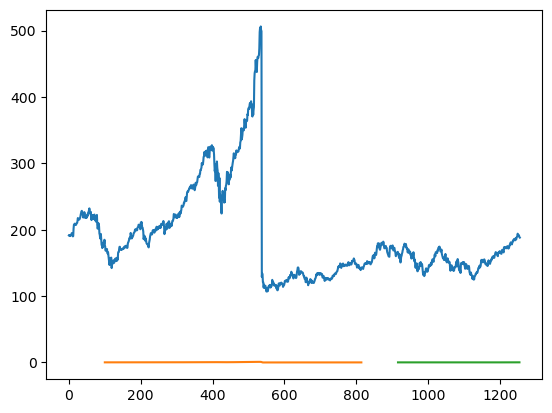

In [41]:
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [42]:
len(test_data)

440

In [43]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 99)

In [44]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [45]:
temp_input

[0.11739511584220413,
 0.11448966812773947,
 0.10429555416405756,
 0.10537257357545393,
 0.10659987476518468,
 0.09986224170319347,
 0.10289292423293667,
 0.10161552911709448,
 0.09635566687539132,
 0.09785848465873509,
 0.11068252974326859,
 0.11769567939887288,
 0.11211020663744514,
 0.11529117094552283,
 0.1095804633688165,
 0.10434564809016905,
 0.10927989981214775,
 0.11458985597996241,
 0.11559173450219157,
 0.12275516593613017,
 0.1206261740763932,
 0.12663744520976827,
 0.13134627426424544,
 0.12771446462116465,
 0.13046963055729488,
 0.13377582968065116,
 0.12884157795867246,
 0.12726361928616153,
 0.13507827175954912,
 0.13906073888541015,
 0.1454226675015654,
 0.14860363180964303,
 0.14725109580463364,
 0.14256731371321218,
 0.14482154038822787,
 0.13823418910457103,
 0.13515341264871633,
 0.1334001252348152,
 0.14707576706324355,
 0.14619912335629304,
 0.14624921728240442,
 0.14935504070131495,
 0.15226048841577955,
 0.14980588603631806,
 0.14572323105823415,
 0.14649968691

In [57]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.11448967 0.10429555 0.10537257 0.10659987 0.09986224 0.10289292
 0.10161553 0.09635567 0.09785848 0.11068253 0.11769568 0.11211021
 0.11529117 0.10958046 0.10434565 0.1092799  0.11458986 0.11559173
 0.12275517 0.12062617 0.12663745 0.13134627 0.12771446 0.13046963
 0.13377583 0.12884158 0.12726362 0.13507827 0.13906074 0.14542267
 0.14860363 0.1472511  0.14256731 0.14482154 0.13823419 0.13515341
 0.13340013 0.14707577 0.14619912 0.14624922 0.14935504 0.15226049
 0.14980589 0.14572323 0.14649969 0.14259236 0.14256731 0.15421415
 0.15739512 0.15716969 0.15453976 0.15180964 0.14765185 0.16713838
 0.16696306 0.16262993 0.16710081 0.16758923 0.16463369 0.16338134
 0.16338134 0.16493425 0.17084534 0.17112085 0.16871634 0.16210394
 0.16280526 0.16568566 0.17179712 0.1764809  0.17635567 0.183469
 0.18562304 0.18219161 0.18126487 0.17778334 0.18467126 0.18564809
 0.19273638 0.19153413 0.19313713 0.19829681 0.19556669 0.19579211
 0.19316218 0.20077646 0.19997495 0.19644333 0.20343

10 day output [[0.21776323]]
11 day input [0.11211021 0.11529117 0.10958046 0.10434565 0.1092799  0.11458986
 0.11559173 0.12275517 0.12062617 0.12663745 0.13134627 0.12771446
 0.13046963 0.13377583 0.12884158 0.12726362 0.13507827 0.13906074
 0.14542267 0.14860363 0.1472511  0.14256731 0.14482154 0.13823419
 0.13515341 0.13340013 0.14707577 0.14619912 0.14624922 0.14935504
 0.15226049 0.14980589 0.14572323 0.14649969 0.14259236 0.14256731
 0.15421415 0.15739512 0.15716969 0.15453976 0.15180964 0.14765185
 0.16713838 0.16696306 0.16262993 0.16710081 0.16758923 0.16463369
 0.16338134 0.16338134 0.16493425 0.17084534 0.17112085 0.16871634
 0.16210394 0.16280526 0.16568566 0.17179712 0.1764809  0.17635567
 0.183469   0.18562304 0.18219161 0.18126487 0.17778334 0.18467126
 0.18564809 0.19273638 0.19153413 0.19313713 0.19829681 0.19556669
 0.19579211 0.19316218 0.20077646 0.19997495 0.19644333 0.20343143
 0.20641202 0.20726362 0.21823419 0.2144521  0.21162179 0.21282405
 0.20999374 0.204809

20 day output [[0.22290203]]
21 day input [0.13134627 0.12771446 0.13046963 0.13377583 0.12884158 0.12726362
 0.13507827 0.13906074 0.14542267 0.14860363 0.1472511  0.14256731
 0.14482154 0.13823419 0.13515341 0.13340013 0.14707577 0.14619912
 0.14624922 0.14935504 0.15226049 0.14980589 0.14572323 0.14649969
 0.14259236 0.14256731 0.15421415 0.15739512 0.15716969 0.15453976
 0.15180964 0.14765185 0.16713838 0.16696306 0.16262993 0.16710081
 0.16758923 0.16463369 0.16338134 0.16338134 0.16493425 0.17084534
 0.17112085 0.16871634 0.16210394 0.16280526 0.16568566 0.17179712
 0.1764809  0.17635567 0.183469   0.18562304 0.18219161 0.18126487
 0.17778334 0.18467126 0.18564809 0.19273638 0.19153413 0.19313713
 0.19829681 0.19556669 0.19579211 0.19316218 0.20077646 0.19997495
 0.19644333 0.20343143 0.20641202 0.20726362 0.21823419 0.2144521
 0.21162179 0.21282405 0.20999374 0.20480902 0.20348153 0.21282354
 0.21282354 0.2127952  0.21311358 0.21357544 0.2141123  0.21467523
 0.21523516 0.2157779

In [58]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [60]:
len(df1)

1256

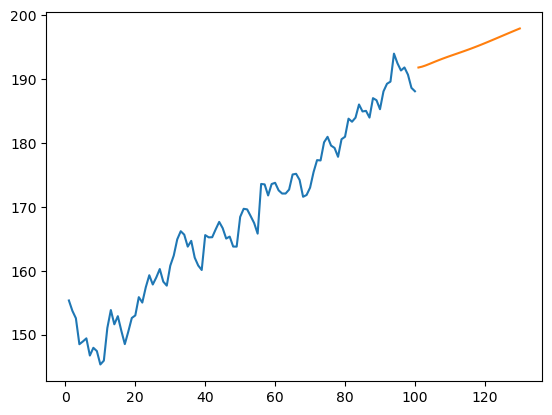

In [62]:
plt.plot(day_new,scaler.inverse_transform(df1[1156:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

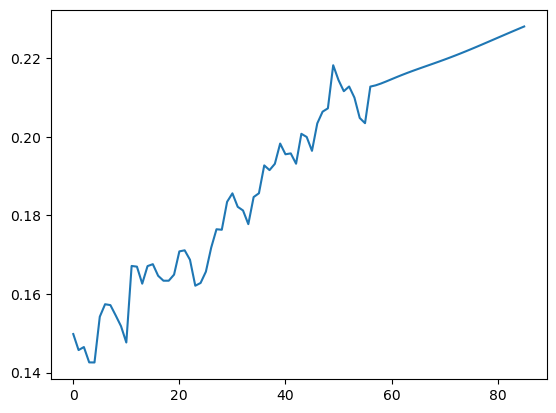

In [63]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [64]:
df3=scaler.inverse_transform(df3).tolist()

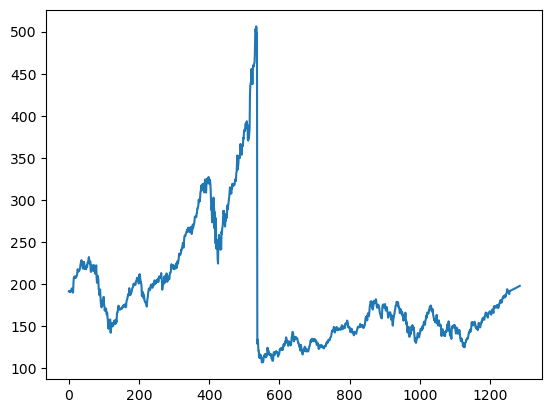

In [65]:
plt.plot(df3)

In [73]:
df1.to_excel('submission', index=False)

AttributeError: 'numpy.ndarray' object has no attribute 'to_excel'